## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Formating for the entire excercise
pd.options.display.float_format = "{:,.2f}".format

# Display the data table for preview
combined_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.00,0,Capomulin,Female,9,22
1,f932,0,45.00,0,Ketapril,Male,15,29
2,g107,0,45.00,0,Ketapril,Female,2,29
3,a457,0,45.00,0,Ketapril,Female,11,30
4,c819,0,45.00,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_num = len(combined_data_df["Mouse ID"].value_counts())
mice_num

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# The duplicated formula helps to identify the duplicities. Then use "subset = ["column A","column B"]" to find it in specific columns. 
# Option 2: setting a formula "keep=False" all duplicates are True (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html)

duplicated_mice = combined_data_df[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"])]
duplicated_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.00,0,Propriva,Female,21,26
360,g989,5,47.57,0,Propriva,Female,21,26
681,g989,10,49.88,0,Propriva,Female,21,26
869,g989,15,53.44,0,Propriva,Female,21,26
1111,g989,20,54.66,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

# Show in the DF the values for an specific objet. Looking in the column of the DF the specific value usin "==" and "variable".

duplicated_mouse = combined_data_df[combined_data_df["Mouse ID"]=="g989"]     # Total Amount of duplicated values is 10 values
duplicated_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.00,0,Propriva,Female,21,26
137,g989,0,45.00,0,Propriva,Female,21,26
329,g989,5,48.79,0,Propriva,Female,21,26
360,g989,5,47.57,0,Propriva,Female,21,26
620,g989,10,51.75,0,Propriva,Female,21,26
681,g989,10,49.88,0,Propriva,Female,21,26
815,g989,15,51.33,1,Propriva,Female,21,26
869,g989,15,53.44,0,Propriva,Female,21,26
950,g989,20,55.33,1,Propriva,Female,21,26
1111,g989,20,54.66,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Inside the DF we choose all the values different "!=" to the value we found duplicated.

clean_data_df = combined_data_df[combined_data_df["Mouse ID"]!="g989"]     # Total amount of data is 1,880 rows.
clean_data_df.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.00,0,Capomulin,Female,9,22
1,f932,0,45.00,0,Ketapril,Male,15,29
2,g107,0,45.00,0,Ketapril,Female,2,29
3,a457,0,45.00,0,Ketapril,Female,11,30
4,c819,0,45.00,0,Ketapril,Male,21,25
5,h246,0,45.00,0,Ketapril,Male,13,30
6,p189,0,45.00,0,Ketapril,Male,8,28
7,n923,0,45.00,0,Ketapril,Male,19,30
8,q119,0,45.00,0,Ketapril,Male,17,30
9,f993,0,45.00,0,Naftisol,Male,21,28


In [7]:
# Checking the number of mice in the clean DataFrame.

# Remembert to chose within [] the specific column you want the count applied in the Data Frame.

total_mice = clean_data_df["Mouse ID"].count()
total_mice

1880

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mice_stat = clean_data_df.groupby(["Drug Regimen"])

# Statitics
mean_mice = mice_stat["Tumor Volume (mm3)"].mean()          # Average of Tumor Volume
median_mice = mice_stat["Tumor Volume (mm3)"].median()      # Median of Tumor Volume
var_mice = mice_stat["Tumor Volume (mm3)"].var()            # Standar Dev of Tumor Volume
stdev_mice = mice_stat["Tumor Volume (mm3)"].std()          # Standar Dev of Tumor Volume
sem_mice = mice_stat["Tumor Volume (mm3)"].sem()          # Standar Dev of Tumor Volume

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

stat_mice_result = pd.DataFrame({"Mean":mean_mice,  
                               "Median":median_mice,
                               "Variance":var_mice,
                               "Standar Deviation":stdev_mice,
                               "SEM":sem_mice
                               })

stat_mice_result.head()


,Mean,Median,Variance,Standar Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Result printed in last point ##

# Using the aggregation method, produce the same summary statistics in a single line. 
# We have already defined the groupby by Drug Regimen, we add the Tummor Volume and the formula allow us to add the statistics ({key:[val a, val b]})

summary_table = mice_stat.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table


Tumor Volume (mm3)                       
                           mean median   var  std  sem
Drug Regimen                                          
Capomulin                 40.68  41.56 24.95 4.99 0.33
Ceftamin                  52.59  51.78 39.29 6.27 0.47
Infubinol                 52.88  51.82 43.13 6.57 0.49
Ketapril                  55.24  53.70 68.55 8.28 0.60
Naftisol                  54.33  52.51 66.17 8.13 0.60
Placebo                   54.03  52.29 61.17 7.82 0.58
Propriva                  52.32  50.45 43.85 6.62 0.54
Ramicane                  40.22  40.67 23.49 4.85 0.32
Stelasyn                  54.23  52.43 59.45 7.71 0.57
Zoniferol                 53.24  51.82 48.53 6.97 0.52

## Bar and Pie Charts

<AxesSubplot:title={'center':'Drug Measurements by Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mices'>

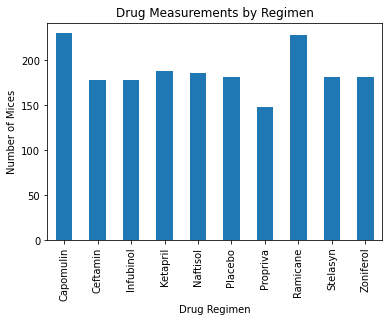

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_reg_data = mice_stat["Mouse ID"].count()
drug_reg_data.plot(kind = "bar", x = "Drug Regimen", y = drug_reg_data, ylabel = "Number of Mices", title = "Drug Measurements by Regimen")


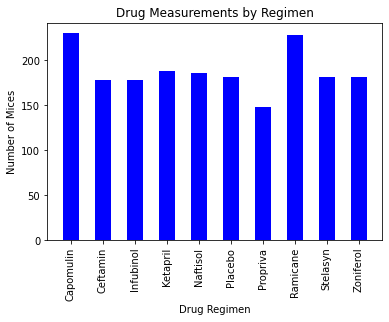

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = drug_reg_data.index             # Using the actual groupby we took the index = names.
y_axis = drug_reg_data.values            # Using the actual groupby we took the values = totals.

# Plot the bar declaring axis x & y, the color and width of the bars.
plt.bar(x_axis, y_axis, color = "b", width = .5)

# Additional formatting.
plt.xticks(rotation="vertical")             # Data in variable x in 90 degrees (vertical)
plt.title("Drug Measurements by Regimen")   # Title of the table
plt.xlabel("Drug Regimen")                  # Title of x axis
plt.ylabel("Number of Mices")               # Title of y axis
plt.show()


Sex
Female    922
Male      958
Name: Sex, dtype: int64

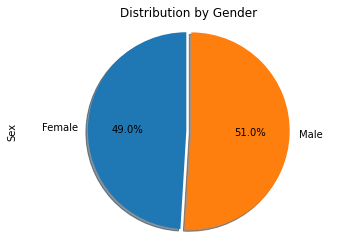

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Define a new groupby by Gender.
mice_gender = clean_data_df.groupby(["Sex"])

# Count accroding to the gener
count_mice = mice_gender["Sex"].count()          # Count by Gender

# Plot the pie / explode = separation / startangle =angle /autopct= percentage numbers / explode:separation.
count_mice.plot(kind = "pie", explode= (0,0.05), shadow=True, startangle=90 ,autopct="%1.1f%%", title = "Distribution by Gender")
plt.axis("equal")
count_mice


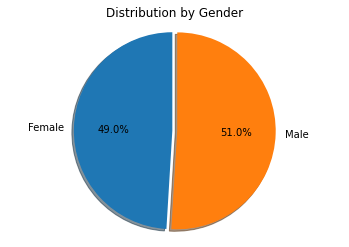

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_val = count_mice.index             # Using the actual groupby we took the index = names.
gender_num = count_mice.values            # Using the actual groupby we took the values = total values.

# Plot the pie
plt.title("Distribution by Gender")
plt.pie(gender_num, explode= (0,0.05), labels=gender_val, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Using a ".loc" fucntion to slice the data (filter) for the asked values. The system suggested to use | instead of +.
specific_regimens = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Capomulin") |
                                      (clean_data_df["Drug Regimen"] == "Ramicane") |
                                      (clean_data_df["Drug Regimen"] == "Infubinol") |
                                      (clean_data_df["Drug Regimen"] == "Ceftamin")]

specific_regimens

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.00,0,Capomulin,Female,9,22
29,c326,0,45.00,0,Infubinol,Female,18,25
30,c139,0,45.00,0,Infubinol,Male,11,28
31,v339,0,45.00,0,Infubinol,Male,20,26
32,a577,0,45.00,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.98,1,Ramicane,Female,7,17
1885,i177,45,33.56,3,Ramicane,Male,10,18
1888,r944,45,41.58,2,Capomulin,Male,12,25
1889,u364,45,31.02,3,Capomulin,Male,18,17


In [46]:
# Option 1 if no merge table is need it ----------------------------------#

# Start by getting the last (greatest) timepoint for each mouse

# # Made a groupy to use the max fucntion for chose the max tiempoint for each Mouse ID.
# max_timepoint = specific_regimens.groupby(["Mouse ID"]).max(["Timepoint"])

# max_timepoint.head(100)

# Option 2 for merging table --------------------------------------------#

timepoint_group = specific_regimens.groupby(["Mouse ID"])

max_timepoint = timepoint_group["Timepoint"].max()

timepoint_group = pd.DataFrame({"Max Timepoint":max_timepoint})

timepoint_group = timepoint_group.reset_index()

timepoint_group


,Mouse ID,Max Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [44]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

combined_dreg4_df = pd.merge(max_timepoint, clean_data_df, how='left', on=["Mouse ID","Timepoint"])
combined_dreg4_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.97,2,Infubinol,Female,20,23
1,a251,45,65.53,1,Infubinol,Female,21,25
2,a275,45,63.00,3,Ceftamin,Female,20,28
3,a411,45,38.41,1,Ramicane,Male,3,22
4,a444,45,43.05,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.59,4,Ceftamin,Female,6,27
96,y793,45,31.90,2,Capomulin,Male,17,17
97,y865,45,64.73,3,Ceftamin,Male,23,26
98,z578,45,30.64,0,Ramicane,Male,11,16


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
